In [1]:
import warnings
warnings.filterwarnings('ignore')
from ba_code.data_processing_and_analysis.data_analyzer import DataAnalyzer, AnalyzerOption, DecomposeOption
from ba_code.data_processing_and_analysis.google_and_tripadvisor.restaurant_review_data_uri import \
    TripadvisorRestaurantReviewDataUri, GoogleRestaurantReviewDataUri, RestaurantReviewDataType
from ba_code.data_processing_and_analysis.prognolite.prognolite_restaurant_constants import \
    Restaurant

dataAnalyzer = DataAnalyzer()

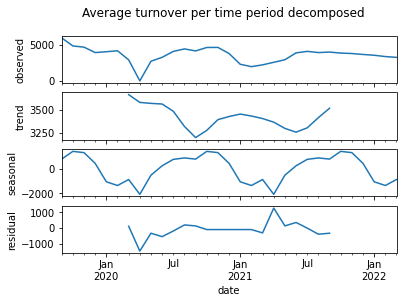

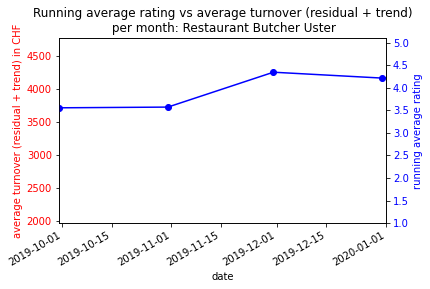

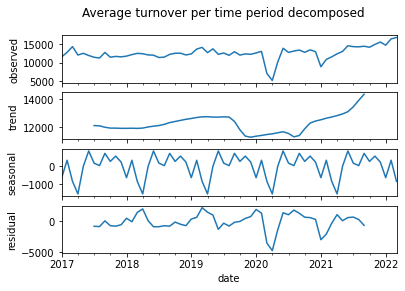

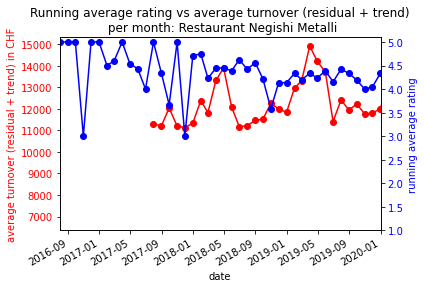

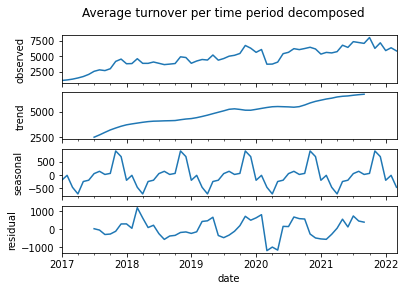

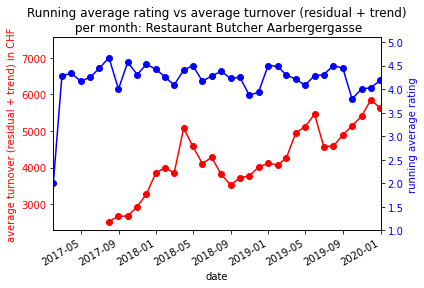

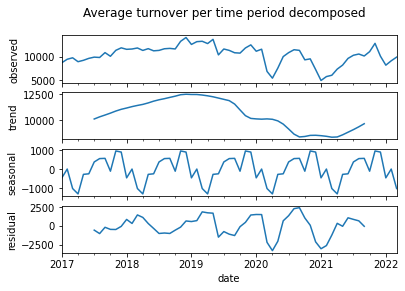

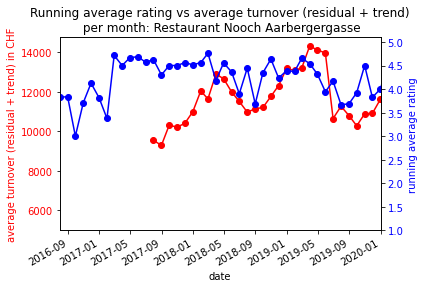

Couldn't perform decompose and generate plot for fwg-nooch-barfi
Couldn't perform decompose and generate plot for fwg-missmiu-europaallee
Couldn't perform decompose and generate plot for fwg-nooch-mallofSwitzerland


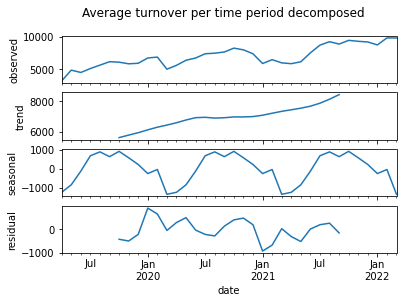

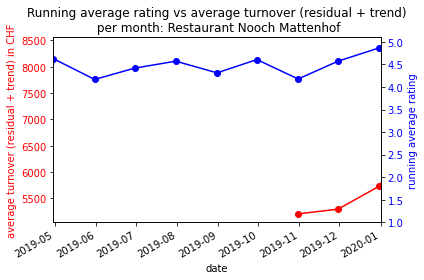

Couldn't perform decompose and generate plot for fwg-butcher-metalli
Couldn't perform decompose and generate plot for fwg-negishi-pilatusstrasse
Couldn't perform decompose and generate plot for fwg-nooch-richti
Couldn't perform decompose and generate plot for fwg-outback-stad
Couldn't perform decompose and generate plot for fwg-negishi-steinen
Couldn't perform decompose and generate plot for fwg-nooch-uster


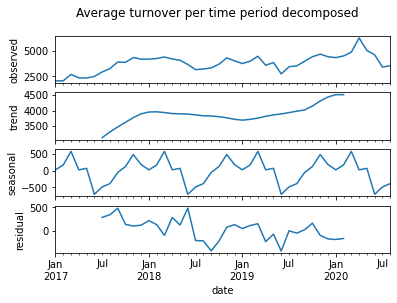

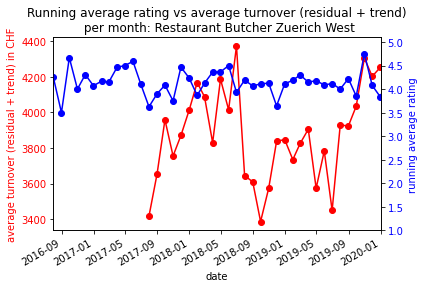

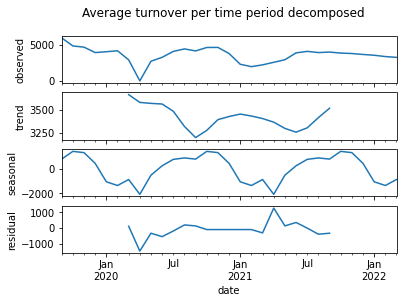

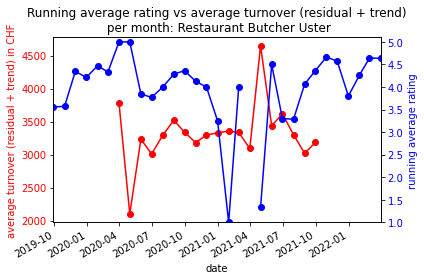

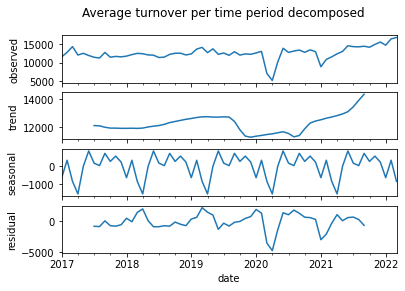

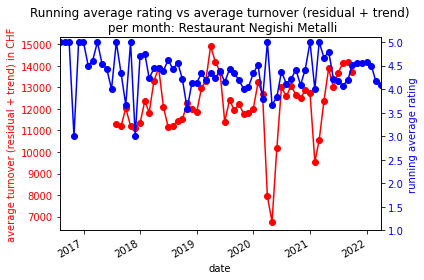

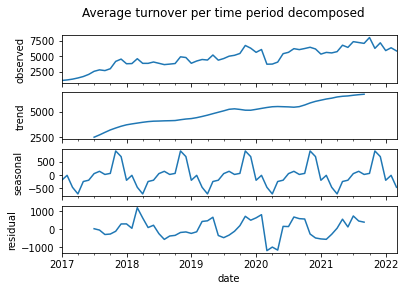

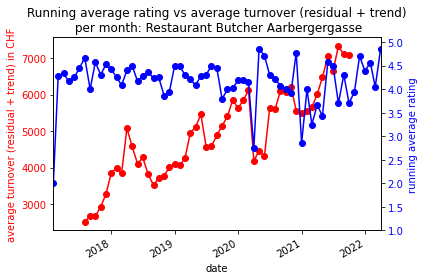

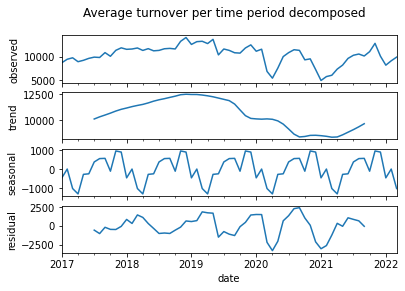

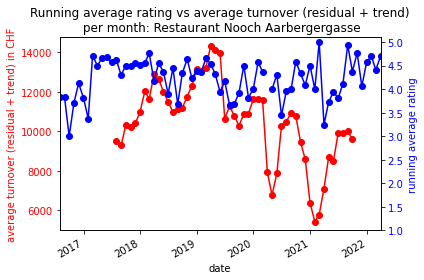

Couldn't perform decompose and generate plot for fwg-nooch-barfi
Couldn't perform decompose and generate plot for fwg-missmiu-europaallee
Couldn't perform decompose and generate plot for fwg-nooch-mallofSwitzerland


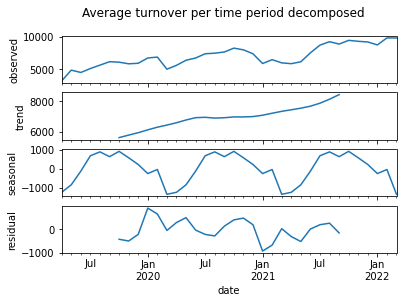

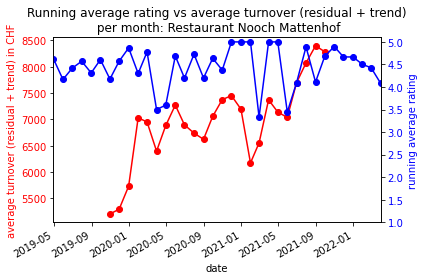

Couldn't perform decompose and generate plot for fwg-butcher-metalli
Couldn't perform decompose and generate plot for fwg-negishi-pilatusstrasse
Couldn't perform decompose and generate plot for fwg-nooch-richti
Couldn't perform decompose and generate plot for fwg-outback-stad
Couldn't perform decompose and generate plot for fwg-negishi-steinen
Couldn't perform decompose and generate plot for fwg-nooch-uster


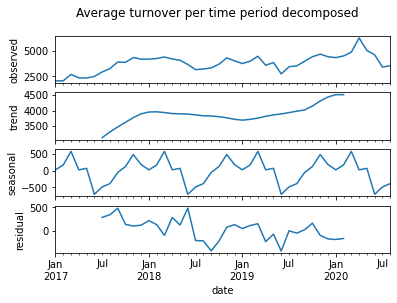

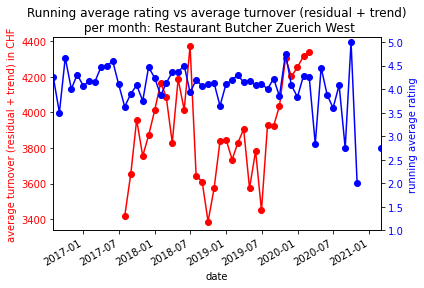

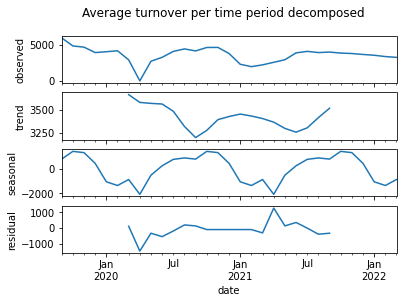


Restaurant: fwg-butcher-uster

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                             NaN   
average_rating_per_time_period                  NaN   

                                average_rating_per_time_period  
residual_plus_trend                                        NaN  
average_rating_per_time_period                             NaN  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                             NaN   
average_rating_per_time_period                  NaN   

                                average_rating_per_time_period  
residual_plus_trend                                        NaN  
average_rating_per_time_period                             NaN  


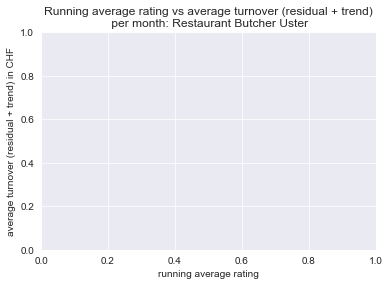

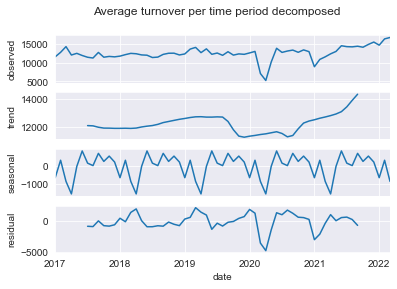


Restaurant: fwg-negishi-metalli

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.010757   

                                average_rating_per_time_period  
residual_plus_trend                                   0.010757  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period            -0.051294   

                                average_rating_per_time_period  
residual_plus_trend                                  -0.051294  
average_rating_per_time_period                        1.000000  


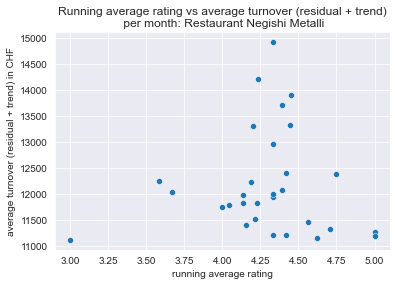

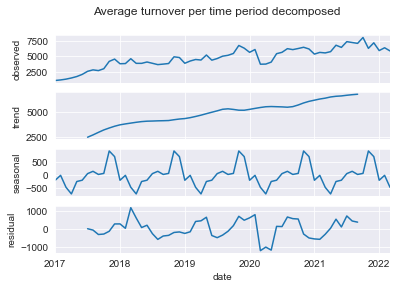


Restaurant: fwg-butcher-aarbergergasse

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period            -0.324712   

                                average_rating_per_time_period  
residual_plus_trend                                  -0.324712  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period            -0.277159   

                                average_rating_per_time_period  
residual_plus_trend                                  -0.277159  
average_rating_per_time_period                        1.000000  


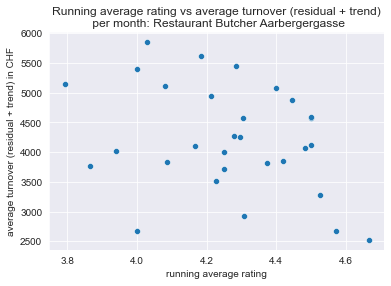

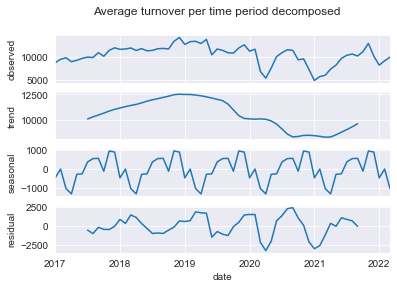


Restaurant: fwg-nooch-aarbergergasse

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.085463   

                                average_rating_per_time_period  
residual_plus_trend                                   0.085463  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.109961   

                                average_rating_per_time_period  
residual_plus_trend                                   0.109961  
average_rating_per_time_period                        1.000000  


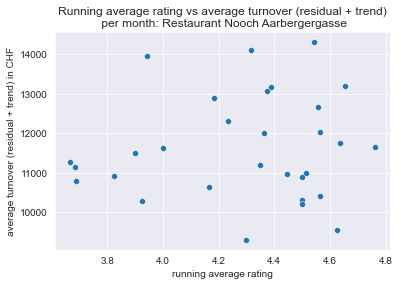

Couldn't perform decompose and compute correlation for fwg-nooch-barfi
Couldn't perform decompose and compute correlation for fwg-missmiu-europaallee
Couldn't perform decompose and compute correlation for fwg-nooch-mallofSwitzerland


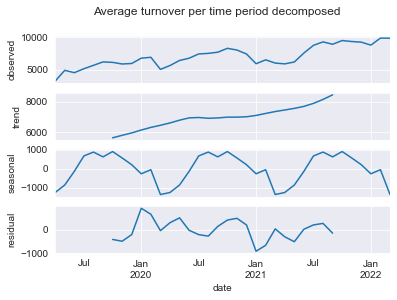


Restaurant: fwg-nooch-mattenhof

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.901328   

                                average_rating_per_time_period  
residual_plus_trend                                   0.901328  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                             1.0   
average_rating_per_time_period                  1.0   

                                average_rating_per_time_period  
residual_plus_trend                                        1.0  
average_rating_per_time_period                             1.0  


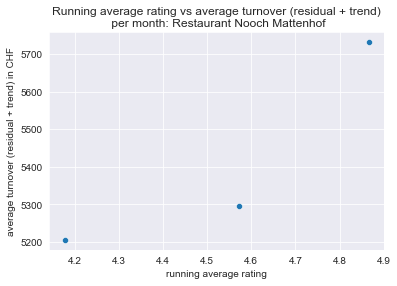

Couldn't perform decompose and compute correlation for fwg-butcher-metalli
Couldn't perform decompose and compute correlation for fwg-negishi-pilatusstrasse
Couldn't perform decompose and compute correlation for fwg-nooch-richti
Couldn't perform decompose and compute correlation for fwg-outback-stad
Couldn't perform decompose and compute correlation for fwg-negishi-steinen
Couldn't perform decompose and compute correlation for fwg-nooch-uster


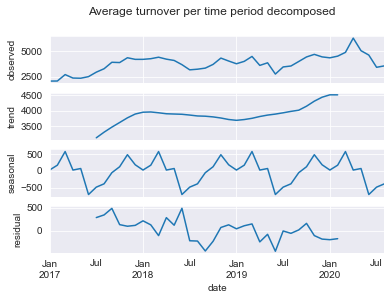


Restaurant: fwg-butcher-zuerichWest

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.196153   

                                average_rating_per_time_period  
residual_plus_trend                                   0.196153  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.081887   

                                average_rating_per_time_period  
residual_plus_trend                                   0.081887  
average_rating_per_time_period                        1.000000  


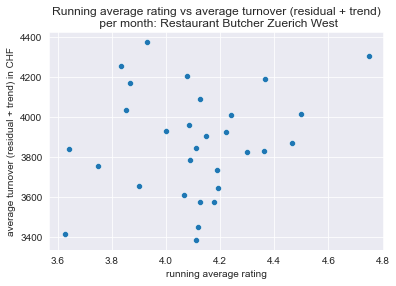

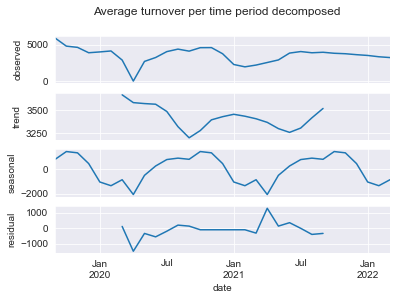


Restaurant: fwg-butcher-uster

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period            -0.516116   

                                average_rating_per_time_period  
residual_plus_trend                                  -0.516116  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period            -0.165632   

                                average_rating_per_time_period  
residual_plus_trend                                  -0.165632  
average_rating_per_time_period                        1.000000  


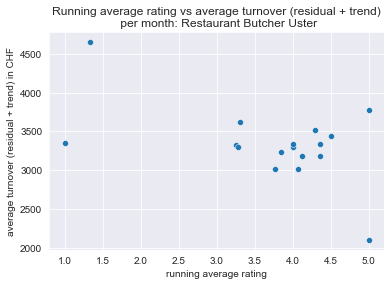

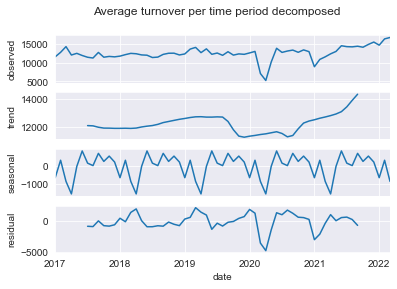


Restaurant: fwg-negishi-metalli

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.063568   

                                average_rating_per_time_period  
residual_plus_trend                                   0.063568  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.049416   

                                average_rating_per_time_period  
residual_plus_trend                                   0.049416  
average_rating_per_time_period                        1.000000  


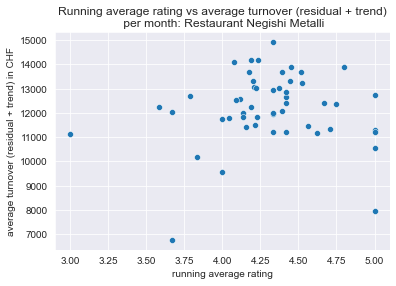

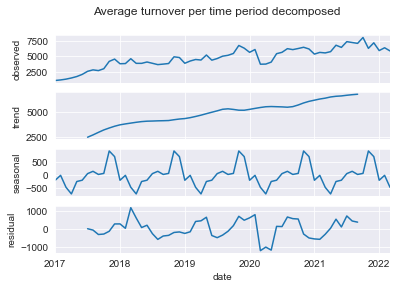


Restaurant: fwg-butcher-aarbergergasse

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period            -0.275632   

                                average_rating_per_time_period  
residual_plus_trend                                  -0.275632  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period            -0.327131   

                                average_rating_per_time_period  
residual_plus_trend                                  -0.327131  
average_rating_per_time_period                        1.000000  


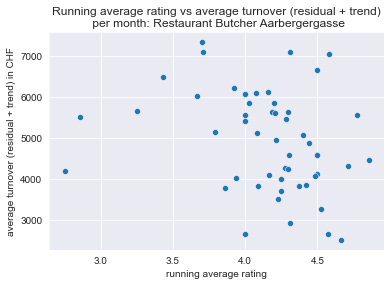

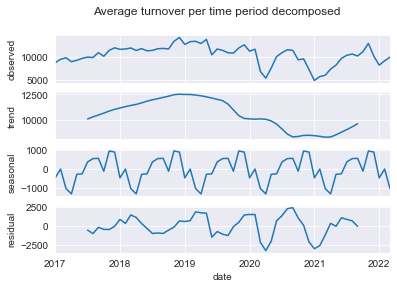


Restaurant: fwg-nooch-aarbergergasse

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.150921   

                                average_rating_per_time_period  
residual_plus_trend                                   0.150921  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.208486   

                                average_rating_per_time_period  
residual_plus_trend                                   0.208486  
average_rating_per_time_period                        1.000000  


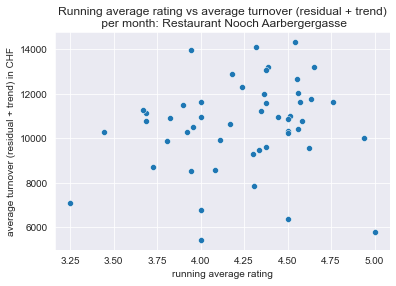

Couldn't perform decompose and compute correlation for fwg-nooch-barfi
Couldn't perform decompose and compute correlation for fwg-missmiu-europaallee
Couldn't perform decompose and compute correlation for fwg-nooch-mallofSwitzerland


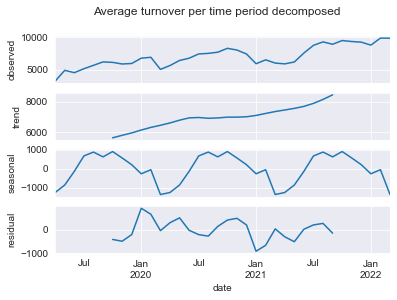


Restaurant: fwg-nooch-mattenhof

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.116371   

                                average_rating_per_time_period  
residual_plus_trend                                   0.116371  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.208345   

                                average_rating_per_time_period  
residual_plus_trend                                   0.208345  
average_rating_per_time_period                        1.000000  


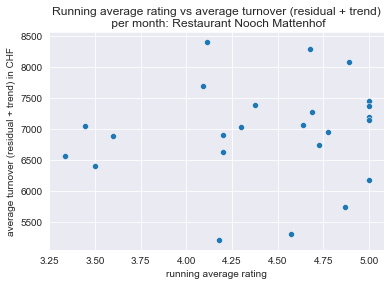

Couldn't perform decompose and compute correlation for fwg-butcher-metalli
Couldn't perform decompose and compute correlation for fwg-negishi-pilatusstrasse
Couldn't perform decompose and compute correlation for fwg-nooch-richti
Couldn't perform decompose and compute correlation for fwg-outback-stad
Couldn't perform decompose and compute correlation for fwg-negishi-steinen
Couldn't perform decompose and compute correlation for fwg-nooch-uster


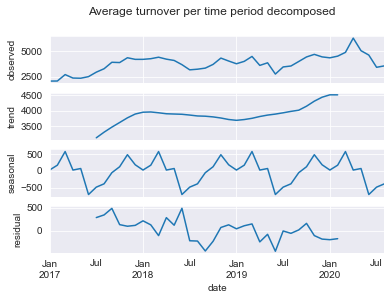


Restaurant: fwg-butcher-zuerichWest

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.245031   

                                average_rating_per_time_period  
residual_plus_trend                                   0.245031  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.178368   

                                average_rating_per_time_period  
residual_plus_trend                                   0.178368  
average_rating_per_time_period                        1.000000  


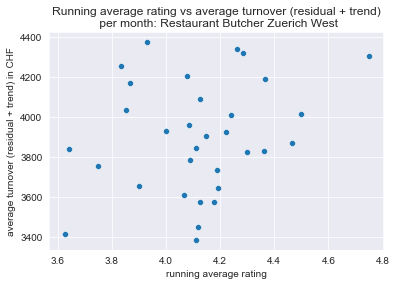

In [2]:
data_type = RestaurantReviewDataType.GOOGLE_REVIEW
time_period = "m"
# overall rating anfang vom monat <-> umsatzzahl ende vom monat  --> besserer vergleich da kunden zuerst rating sehen müssen
rating_date_offset_in_months = -1
decompose_option = DecomposeOption.RESIDUAL_PLUS_TREND

# TODO: 1. get lineplots of all rest overall rating vs turnover
dataAnalyzer.plot_for_all_restaurants(
    analyzer_option=AnalyzerOption.AVERAGE_RATING_VS_AVERAGE_TURNOVER,
    restaurant_review_data_type=data_type,
    time_period=time_period,
    rating_date_offset_in_months=rating_date_offset_in_months,
    filter_corona_data=True,
    decompose_option=decompose_option)

dataAnalyzer.plot_for_all_restaurants(
    analyzer_option=AnalyzerOption.AVERAGE_RATING_VS_AVERAGE_TURNOVER,
    restaurant_review_data_type=data_type,
    time_period=time_period,
    rating_date_offset_in_months=rating_date_offset_in_months,
    filter_corona_data=False,
    decompose_option=decompose_option)

# TODO: look at correlations overall rating vs turnover
df_pearson_spearman_before_corona = dataAnalyzer.compute_correlation_for_all_restaurants(
    analyzer_option=AnalyzerOption.AVERAGE_RATING_VS_AVERAGE_TURNOVER,
    restaurant_review_data_type=data_type,
    time_period=time_period,
    rating_date_offset_in_months=rating_date_offset_in_months,
    filter_corona_data=True,
    decompose_option=decompose_option)

df_pearson_spearman_with_corona = dataAnalyzer.compute_correlation_for_all_restaurants(
    analyzer_option=AnalyzerOption.AVERAGE_RATING_VS_AVERAGE_TURNOVER,
    restaurant_review_data_type=data_type,
    time_period=time_period,
    rating_date_offset_in_months=rating_date_offset_in_months,
    filter_corona_data=False,
    decompose_option=decompose_option)

In [3]:
from IPython.core.display import display, HTML
import pandas as pd

#data = df_pearson_spearman #pd.DataFrame({"A":[1,2,3,4,5], "B":[10,20,30,40,50]})
for restaurant in Restaurant:
    picture_name_before_corona = DataAnalyzer.get_picture_name(restaurant, filter_corona_data=True)
    """
    df_pearson_spearman_before_corona.loc[df_pearson_spearman_before_corona["restaurant_name"] == picture_name_before_corona,'before_corona'] = \
        '<img src="{}" alt="img">'.format(picture_name_before_corona + "-corr.png")
    """
    df_pearson_spearman_before_corona.loc[df_pearson_spearman_before_corona["restaurant_name"] == picture_name_before_corona,'before_corona'] = \
    '<table><tr><td> <img src="{}" alt="img"></td></tr><tr><td> <img src="{}" alt="img"></td></tr></table>' \
    .format(
        picture_name_before_corona + "-lineplot.png",
        picture_name_before_corona + "-corr.png")

    picture_name_with_corona = DataAnalyzer.get_picture_name(restaurant, filter_corona_data=False)
    """
    df_pearson_spearman_with_corona.loc[df_pearson_spearman_with_corona["restaurant_name"] == picture_name_with_corona,'with_corona'] = \
        '<img src="{}" alt="img">'.format(picture_name_with_corona + "-corr.png")
    """
    df_pearson_spearman_with_corona.loc[df_pearson_spearman_with_corona["restaurant_name"] == picture_name_with_corona,'with_corona'] = \
    '<table><tr><td> <img src="{}" alt="img"></td></tr><tr><td> <img src="{}" alt="img"></td></tr></table>' \
    .format(
        picture_name_with_corona + "-lineplot.png",
        picture_name_with_corona + "-corr.png")
    
df_pearson_spearman_before_corona["pearson_spearman"] = \
    df_pearson_spearman_before_corona["pearson"].map('${:,.2f}'.format).astype(str) + ", " + df_pearson_spearman_before_corona["spearman"].map('${:,.2f}'.format).astype(str)
df_pearson_spearman_with_corona["pearson_spearman"] = \
    df_pearson_spearman_with_corona["pearson"].map('${:,.2f}'.format).astype(str) + ", " + df_pearson_spearman_with_corona["spearman"].map('${:,.2f}'.format).astype(str)
df = pd.DataFrame({#"restaurant_name":[restaurant.value for restaurant in Restaurant],
              "pear_s_before":df_pearson_spearman_before_corona["pearson_spearman"].to_list(),
              "before_corona":df_pearson_spearman_before_corona["before_corona"].to_list(),
              "pear_s_with":df_pearson_spearman_with_corona["pearson_spearman"].to_list(),
              "with_corona":df_pearson_spearman_with_corona["with_corona"].to_list()})

display(HTML(df.to_html(escape=False, index=False)))